In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on 2023-05-12

@author: u300737
"""
import os
import sys

import numpy as np
import pandas as pd
import xarray as xr

start_path=os.getcwd()
ac3_scripts_path=start_path+"/../scripts/"
my_git_path=start_path+"/../../"
major_work_path=my_git_path+"/../Work/GIT_Repository/"
hamp_processing_path=my_git_path+"/hamp_processing_python/"

synth_ar_path=my_git_path+"/Synthetic_Airborne_Arctic_ARs/"
retrieval_src_path=my_git_path+"/hamp_retrieval_haloac3/"
config_path=synth_ar_path+"config/"
sys.path.insert(1,config_path)
sys.path.insert(2,ac3_scripts_path)
sys.path.insert(3,synth_ar_path+"src/")
sys.path.insert(4,synth_ar_path+"plotting/")
sys.path.insert(5,hamp_processing_path)
sys.path.insert(6,hamp_processing_path+"plotting/")
sys.path.insert(7,retrieval_src_path+"src/")
sys.path.insert(8,start_path+"/../plotting/")
import data_config
###############################################################################
import flightcampaign
import moisturebudget as Budgets
###############################################################################
#Grid Data
from reanalysis import ERA5,CARRA 
from ICON import ICON_NWP as ICON
import gridonhalo as Grid_on_HALO
###############################################################################
#-----------------------------------------------------------------------------#
import warnings
warnings.filterwarnings("ignore")

class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout
import Performance
performance=Performance.performance()

C:\Users\u300737\AppData\Local\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


### Plotting routines

In [69]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams.update({"font.size":16})
def plot_AR_intensity_boxplot(merged_halo_icon_ivt,sector_sondes):
    matplotlib.rcParams.update({"font.size":20})
    AR_intensity_fig=plt.figure(figsize=(12,5.5))
    ax1=AR_intensity_fig.add_subplot(111)
    ax2=ax1.twinx()
    ivt_props=dict(widths=0.3,patch_artist=True,boxprops=dict(facecolor="mediumseagreen",color="k",lw=2),
               medianprops=dict(color="whitesmoke",lw=3,),
              whiskerprops=dict(lw=2),capprops=dict(lw=2))

    iwv_props=dict(widths=0.3,patch_artist=True,boxprops=dict(facecolor="purple",color="k",lw=2),
               medianprops=dict(color="gold",lw=3,),
              whiskerprops=dict(lw=2),capprops=dict(lw=2))

    ax1.boxplot([merged_halo_icon_ivt[merged_halo_icon_ivt["Sector"]=="S1"]["IVT"],
                merged_halo_icon_ivt[merged_halo_icon_ivt["Sector"]=="S2"]["IVT"],
                merged_halo_icon_ivt[merged_halo_icon_ivt["Sector"]=="S3"]["IVT"],
                merged_halo_icon_ivt[merged_halo_icon_ivt["Sector"]=="S4"]["IVT"]],
                positions=[0.8,1.8,2.8,3.8],**ivt_props)
    ax1.scatter(np.repeat([0.8],sector_sondes["S1"]["IVT"].shape[0]),sector_sondes["S1"]["IVT"],marker="v",s=100,zorder=3,
               color="mintcream",edgecolor="k",lw=1.5)
    ax1.scatter(np.repeat([1.8],sector_sondes["S2"]["IVT"].shape[0]),sector_sondes["S2"]["IVT"],marker="v",s=100,zorder=3,
               color="mintcream",edgecolor="k",lw=1.5)
    ax1.scatter(np.repeat([2.8],sector_sondes["S3"]["IVT"].shape[0]),sector_sondes["S3"]["IVT"],marker="v",s=100,zorder=3,
               color="mintcream",edgecolor="k",lw=1.5)
    ax1.scatter(np.repeat([3.8],sector_sondes["S4"]["IVT"].shape[0]),sector_sondes["S4"]["IVT"],marker="v",s=100,zorder=3,
               color="mintcream",edgecolor="k",lw=1.5)

    ax2.boxplot([merged_halo_icon_ivt[merged_halo_icon_ivt["Sector"]=="S1"]["IWV_calc"],
                merged_halo_icon_ivt[merged_halo_icon_ivt["Sector"]=="S2"]["IWV_calc"],
                merged_halo_icon_ivt[merged_halo_icon_ivt["Sector"]=="S3"]["IWV_calc"],
                merged_halo_icon_ivt[merged_halo_icon_ivt["Sector"]=="S4"]["IWV_calc"]],
                positions=[1.2,2.2,3.2,4.2],**iwv_props)

    ax2.scatter(np.repeat([1.2],sector_sondes["S1"]["IWV"].shape[0]),sector_sondes["S1"]["IWV"],marker="v",s=100,zorder=3,
               color="lavender",edgecolor="k",lw=1.5)
    ax2.scatter(np.repeat([2.2],sector_sondes["S2"]["IWV"].shape[0]),sector_sondes["S2"]["IWV"],marker="v",s=100,zorder=3,
               color="lavender",edgecolor="k",lw=1.5)
    ax2.scatter(np.repeat([3.2],sector_sondes["S3"]["IWV"].shape[0]),sector_sondes["S3"]["IWV"],marker="v",s=100,zorder=3,
               color="lavender",edgecolor="k",lw=1.5)
    ax2.scatter(np.repeat([4.2],sector_sondes["S4"]["IWV"].shape[0]),sector_sondes["S4"]["IWV"],marker="v",s=100,zorder=3,
               color="lavender",edgecolor="k",lw=1.5)

    ax1.set_xlabel("AR Corridor")
    ax1.set_xticks([1,2,3,4])
    ax1.set_xticklabels(["S1","S2","S3","S4"])
    ax1.set_yticks([0,200,400])
    ax1.set_ylim([0,500])
    ax2.set_yticks([0,8,16])
    ax2.set_ylim([0,20])
    ax1.set_ylabel("IVT ($\mathrm{kg\,m}^{-1}{\mathrm{s}}^{-1})$",color="darkgreen")
    ax2.set_ylabel("IWV ($\mathrm{kg\,m}^{-2})$",color="purple")
    ax1.spines["bottom"].set_linewidth(2)
    ax1.spines["left"].set_linewidth(2)
    ax1.tick_params("x",width=2,length=8)
    ax1.tick_params("y",width=2,length=8)
    ax2.tick_params("y",width=2,length=8)

    sns.despine(offset=10,ax=ax1)
    sns.despine(offset=10,ax=ax2)
    fig_name="Fig10_HALO_RF05_RF06_IVT_tendency.pdf"
    plot_path=os.getcwd()+"/../plots/"
    AR_intensity_fig.savefig(plot_path+fig_name,dpi=300,bbox_inches="tight")
    print("Figure saved as:", plot_path+fig_name)
    
def plot_component_tendency(d_IWV_dt,d_IWV_dt_uncertainty,
                            adv_q_series,mass_div_series,
                            adv_q_unc,mass_div_unc,
                            #adv_q_series_min,adv_q_series_max,
                            #mass_div_series_min,mass_div_series_max,
                            sector_precip,Evap_Sectors,
                            plot_path=os.getcwd()+"/../plots/",with_residuals=pd.DataFrame(),
                            scalar_based_div=False,with_boxplots=False):
    matplotlib.rcParams.update({"font.size":20})
    if with_boxplots:
        budget_components_fig, (ax1, ax2) =plt.subplots(2,1,figsize=(12,9),gridspec_kw={'height_ratios': [0.5, 1]})
        sns.boxplot(data=merged_halo_icon_ivt, x="Sector", y="IVT",ax=ax1,palette=["darkgreen","seagreen","teal","lightseagreen"],
               width=0.4)
        ax1.set_xlabel(" ")
        ax1.set_ylabel("IVT ($\mathrm{kg\,m}^{-1}{\mathrm{s}}^{-1})$")
        ax1.spines['left'].set_linewidth(2)
        ax1.spines['bottom'].set_linewidth(2)
        ax1.xaxis.set_tick_params(width=2,length=4)
        ax1.yaxis.set_tick_params(width=2,length=4)
    else:
        budget_components_fig=plt.figure(figsize=(12,6))
        ax2=budget_components_fig.add_subplot(111)
    ax2.spines['left'].set_linewidth(2)
    ax2.spines['bottom'].set_linewidth(2)
    ax2.xaxis.set_tick_params(width=2,length=4)
    ax2.yaxis.set_tick_params(width=2,length=4)
    marker_size=17
    # Local change IWV
    ax2.errorbar([0.8,1.8,2.8,3.8],d_IWV_dt_hamp.values,yerr=d_IWV_dt_uncertainty, marker='v', mfc='grey',
             mec='black', ecolor="dimgrey",ms=marker_size+2, lw=2,mew=1,ls="",label="$dIWV/dt$")
    # Evaporation
    ax2.errorbar([0.9,1.9,2.9,3.9], -1*Evap_Sectors["mean"].values, yerr=Evap_Sectors["std"].values, marker='s', mfc='red',
             mec='black', ecolor="dimgrey",lw=2,ms=marker_size, mew=1,ls="",label="$E$")
    # Precipitation
    ax2.errorbar([0.95,1.95,2.95,3.95],-1*sector_precip["rate"].values,
                 yerr=[(sector_precip["max_rate"]-sector_precip["rate"].values),
                       (sector_precip["rate"].values-sector_precip["min_rate"].values)],marker="s",
                 # ---> think about direction and sign of errorbars
                 ecolor="dimgrey",mfc="lightblue",
                mec="black",ms=marker_size,mew=1,lw=2,ls="",label="-$P$")
    # Mass divergence
    ax2.errorbar(np.array([1,2,3,4]),-mass_div_series,yerr=mass_div_unc,
                 #yerr=[mass_div_series_max-mass_div_series,mass_div_series-mass_div_series_min],
                 marker="s",mfc="teal",ls="",ms=marker_size,mew=1,markeredgecolor="k",lw=2,ecolor="dimgrey",label="$DIV_{mass}$")
    
    # Moisture Advection
    ax2.errorbar(np.array([1.05,2.05,3.05,4.05]),-adv_q_series,yerr=adv_q_unc,
                 #yerr=[adv_q_series_max-adv_q_series,adv_q_series-adv_q_series_min],
                 marker="s",ms=marker_size,mew=1,
                 mfc="darkgreen",ls="",markeredgecolor="k",ecolor="dimgrey",lw=2,label="$ADV_{q}$")
    #Residuals
    if with_residuals.shape[0]>0:
        ax2.errorbar(np.array([1.1,2.1,3.1,4.1]),residuals["value"],yerr=residuals["unc"],marker="x",
                     mfc="k",mec="k",ecolor="dimgrey",lw=2,ms=marker_size,mew=1,ls="",label="residual")
        
    ##
    ax2.axhline(y=0,ls="--",lw=1,color="k")
    ax2.set_ylabel("Moisture Budget \nContribution ($\mathrm{mm\,h}^{-1}$)")
    ax2.set_xticks([1,2,3,4])
    ax2.set_xticklabels(["S1","S2","S3","S4"])#
    
    col_number=5
    if with_residuals.shape[0]>0:
        col_number+=1
    legend=ax2.legend(loc="lower right",ncol=col_number,frameon=True,fontsize=17)
    frame = legend.get_frame()
    frame.set_color('lightgrey')
    frame.set_edgecolor('black')

    import matplotlib.patches as mpatches
    sns.despine(offset=10)
    file_end=".pdf"
    fig_name="HALO_Budget_components_tendency"
    if not with_boxplots:
        fig_name="Fig11_"+fig_name
    if with_residuals.shape[0]>0:
        fig_name+="_with_residuals"
    if scalar_based_div:
        fig_name+="_scalar_based"
    fig_name+=file_end
    budget_components_fig.savefig(plot_path+fig_name,dpi=300,bbox_inches="tight")
    print("Figure saved as:",plot_path+fig_name)

def plot_budget_residuals(residuals,components={},plot_path=os.getcwd()+"/../plots/",save_as_manuscript_plot=True):
    """
    This routine plots the resiudals emerging from the moisture budget closure for all sectors
    """

    matplotlib.rcParams.update({"font.size":20})
    residuals_fig, ax = plt.subplots(1,1,figsize=(12,6))
    ax.errorbar(np.array([1,2,3,4]),residuals["value"],
            yerr=residuals["unc"],marker="X",mfc="red",
            mec="k",ecolor="darkred",lw=4,ms=20,
            mew=2,ls="",label="residual")

    ax.axhline(y=0,ls="--",lw=1,color="k")
    ax.set_ylabel("Moisture Budget \nContribution ($\mathrm{mm\,h}^{-1}$)")
    ax.set_xticks([1,2,3,4])
    ax.set_xticklabels(["S1","S2","S3","S4"])#
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.xaxis.set_tick_params(width=2,length=4)
    ax.yaxis.set_tick_params(width=2,length=4)
    if not components=={}:
        ax.bar([0.75,1.75,2.75,3.75],components["dIWV_dt"],width=0.1,edgecolor="white",
               yerr=components["dIWV_dt_unc"],color="grey",alpha=0.5)
        ax.bar([0.85,1.85,2.85,3.85],-components["ADV"],width=0.1,edgecolor="white",
               yerr=components["ADV_unc"],color="lightgreen",alpha=0.5)
        ax.bar([0.95,1.95,2.95,3.95],-components["DIV"],width=0.1,edgecolor="white",
               yerr=components["DIV_unc"],color="teal",alpha=0.5)
        ax.bar([1.05,2.05,3.05,4.05],-components["Precip"]["rate"],width=0.1,edgecolor="white",
               yerr=(components["Precip"]["max_rate"]-components["Precip"]["min_rate"])/2,color="lightblue",alpha=0.5)
        ax.bar([1.15,2.15,3.15,4.15],components["Evap"]["mean"],width=0.1,edgecolor="white",
               yerr=components["Evap"]["std"],color="red",alpha=0.5)
    ax.legend()
    sns.despine(offset=10)
    file_end=".pdf"
    fig_name="HALO_Budget_residual_tendency"
    fig_name+=file_end
    if save_as_manuscript_plot:
        fig_name="Fig13_"+fig_name
    residuals_fig.savefig(plot_path+fig_name,dpi=300,bbox_inches="tight")
    print("Figure saved as:",plot_path+fig_name)
    

In [51]:
# third hamp value shifted due to not working F-BAND module
flights=["RF05","RF06"]
ars_of_day=["AR_entire_1","AR_entire_2"]
campaign="HALO_AC3"
halo_icon_hmps={}
halo_icon_ivts={}
precip_rates={}
flight_dates={"RF05":"20220315",
              "RF06":"20220316"}
sectors=["S1","S2","S3","S4"]
s=0
sector_sondes={}
for flight in flights:
    for ar_of_day in ars_of_day:
        sector_to_plot="warm"
        from simplified_flight_leg_handling import simplified_run_grid_main
        with HiddenPrints():
            halo_era5,halo_df,cmpgn_cls,ERA5_on_HALO,radar,sector_sondes[sectors[s]]=\
            simplified_run_grid_main(flight=[flight],config_file_path=major_work_path,ar_of_day=ar_of_day)
        # ICON File
        icon_major_path=cmpgn_cls.campaign_path+"/data/ICON_LEM_2KM/"
        hydrometeor_icon_path=cmpgn_cls.campaign_path+"/data/ICON_LEM_2KM/"
        icon_resolution=2000 # units m
        upsample_time="20min"
        date=flight_dates[flight]
        interp_icon_hmp_file=flight+"_"+ar_of_day+"_"+"interpolated_HMP.csv"
        interp_icon_ivt_file=flight+"_"+ar_of_day+"_"+"ICON_Interpolated_IVT.csv"
        icon_var_list=ICON.lookup_ICON_AR_period_data(cmpgn_cls.name,[flight],ar_of_day,
                                                 icon_resolution,
                                                 hydrometeor_icon_path,
                                                 synthetic=False)

        ICON_on_HALO=Grid_on_HALO.ICON_on_HALO(
        cmpgn_cls,icon_var_list,halo_df,[flight],date,
        interpolated_hmp_file=interp_icon_hmp_file,
        interpolated_hmc_file=None,ar_of_day=ar_of_day,
        upsample_time=upsample_time,
        synthetic_icon=False,
        synthetic_flight=False)

        hydrometeor_icon_path=hydrometeor_icon_path+flight+"/"
        ICON_on_HALO.update_ICON_hydrometeor_data_path(hydrometeor_icon_path)
        halo_icon_ivts[flight+"_"+ar_of_day]=pd.read_csv(hydrometeor_icon_path+interp_icon_ivt_file,index_col=0)
        halo_icon_ivts[flight+"_"+ar_of_day]["Sector"]=sectors[s]
        halo_icon_hmps[flight+"_"+ar_of_day]=ICON_on_HALO.load_interpolated_hmp()
        halo_icon_hmps[flight+"_"+ar_of_day]["Sector"]=sectors[s]
        #### cut dropsondes
        sector_sondes[sectors[s]]["IVT"]=sector_sondes[sectors[s]]["IVT"].loc[halo_icon_ivts[flight+"_"+ar_of_day].index[0]:\
                                                                halo_icon_ivts[flight+"_"+ar_of_day].index[-1]]
        sector_sondes[sectors[s]]["IWV"]=sector_sondes[sectors[s]]["IWV"].loc[halo_icon_ivts[flight+"_"+ar_of_day].index[0]:\
                                                                halo_icon_ivts[flight+"_"+ar_of_day].index[-1]]
        
        # read precip rates########
        rate_path =cmpgn_cls.campaign_path+"/data/precip_rates/"
        rate_fname=sector_to_plot+"_precip_"+flight+"_"+ar_of_day+".csv"
        precip_rates[flight+"_"+ar_of_day]=pd.read_csv(rate_path+rate_fname,index_col=0)
        precip_rates[flight+"_"+ar_of_day]["Sector"]=s+1
        if s==0:
            merged_precipitation=precip_rates[flight+"_"+ar_of_day]
        else:
            merged_precipitation=pd.concat([merged_precipitation,precip_rates[flight+"_"+ar_of_day]])
        
        ############
        s+=1
merged_rates         = pd.concat(precip_rates.values())
merged_halo_icon_hmp = pd.concat(halo_icon_hmps.values())
merged_halo_icon_ivt = pd.concat(halo_icon_ivts.values())

RF05_AR_entire_1_interpolated_HMP.csv  is already calculated and will be opened
RF05_AR_entire_2_interpolated_HMP.csv  is already calculated and will be opened
RF06_AR_entire_1_interpolated_HMP.csv  is already calculated and will be opened
RF06_AR_entire_2_interpolated_HMP.csv  is already calculated and will be opened


## AR decay

Figure saved as: C:\Users\u300737\Desktop\Desktop_alter_Rechner\PhD_UHH_WIMI\my_GIT\HALO_AC3_AR_Budget_Closure\notebooks/../plots/Fig10_HALO_RF05_RF06_IVT_tendency.pdf


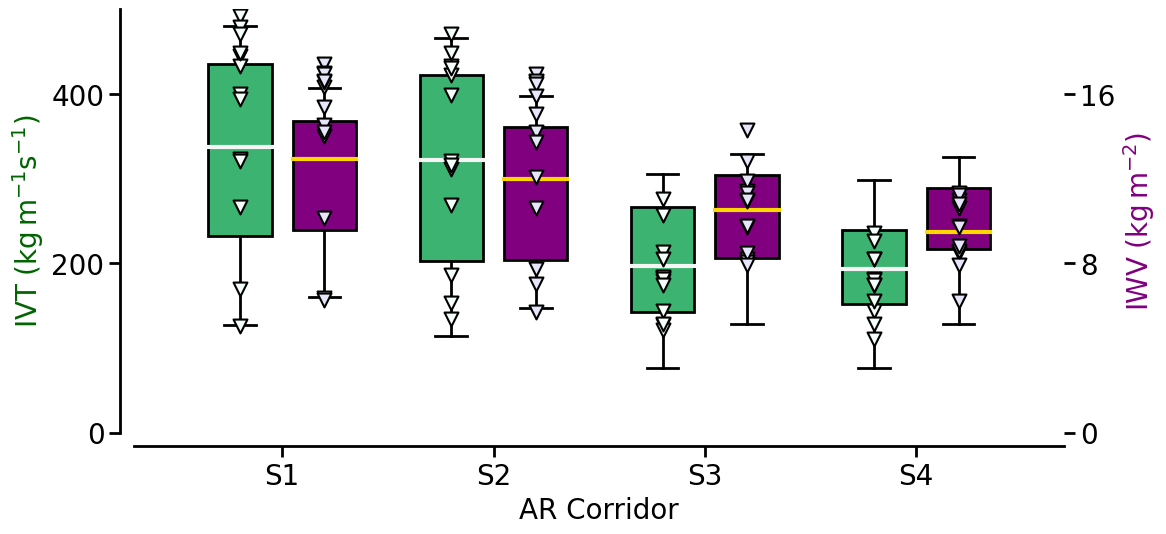

In [52]:
plot_AR_intensity_boxplot(merged_halo_icon_ivt,sector_sondes)

## Budget component values

In [53]:

Evap_Sectors=pd.DataFrame(data=np.nan,columns=["mean","std"],index=sectors)
Evap_Sectors["mean"]=[0.002438,0.00275,-0.015,-0.0038]
Evap_Sectors["std"]=[0.006509,0.005,0.0083,0.0101]

scalar_based_div=False
warm_sonde_values={}

# scalar-based divergence values
if scalar_based_div:
    warm_sonde_values["S1"]={
      'mass_div': -0.41276886889204784,
      'mass_div_min': -0.7301260286358718,
      'mass_div_max': -0.09541170914822367,
      'q_ADV': -0.7907497132061316,
      'q_ADV_min': -1.565287488594897,
      'q_ADV_max': -0.016211937817365973}

    warm_sonde_values["S2"]={
        'mass_div': -0.1882352622233449,
        'mass_div_min': -0.6452538732851526,
        'mass_div_max': 0.2687833488384628,
        'q_ADV': -0.5474630545351018,
        'q_ADV_min': -1.3557554102823333,
        'q_ADV_max': 0.2608293012121298}

    warm_sonde_values["S3"]={
         'mass_div': -0.22776075016667244,
         'mass_div_min': -0.5096074494526325,
         'mass_div_max': 0.05408594911928759,
         'q_ADV': -0.7544264531963553,
         'q_ADV_min': -1.3814041637839345,
         'q_ADV_max': -0.12744874260877628}
    #    'mass_div': -0.23570411496183644,
    #    'mass_div_min': -0.602622062208785,
    #    'mass_div_max': 0.13121383228511205,
    #    'q_ADV': -0.7594541149453358,
    #    'q_ADV_min': -1.497718568202485,
    #    'q_ADV_max': -0.021189661688186773}

    warm_sonde_values["S4"]={
        'mass_div': -0.41276886889204784,
        'mass_div_min': 0.056,
        'mass_div_max': -0.09541170914822367,
        'q_ADV': -0.7907497132061316,
        'q_ADV_min': -1.565287488594897,
        'q_ADV_max': -0.016211937817365973}
else:
    # List of uncertainties
    #---------------------------------
    #S1
    # UNC adv  0.09904659648151819
    # UNC mass 0.0390540623580486
    #---------------------------------
    #S2
    # UNC adv  0.12255051592378231
    # UNC mass 0.05330051908475317
    #---------------------------------
    #---------------------------------
    #S4
    warm_sonde_values["S1"]={
      'mass_div': 0.320,
      'mass_div_min': 0.056,
      'mass_div_max': 0.323,
      'mass_div_unc':0.05606615583661565,#0.0390540623580486,
        'q_ADV': 0.162,
      'q_ADV_min': -0.42,
      'q_ADV_max': 0.74,
      'q_ADV_unc':0.13915442129379024 #now 400 meter correlation length 0.09904659648151819,
        }

    warm_sonde_values["S2"]={
        'mass_div': 0.369,
        'mass_div_min': -0.006,
        'mass_div_max': 0.378,
        'mass_div_unc': 0.07579105179504261,#0.0533,
        'q_ADV': 0.309,
        'q_ADV_min': -0.328,
        'q_ADV_max': 0.946,
        'q_ADV_unc': 0.1722415822353062,#0.12255051592378231
        }
    warm_sonde_values["S3"]={
         'mass_div': -0.01606136995913354,
         'mass_div_min': -0.07745809018313218,
         'mass_div_max': 0.14004981735327982,
         'mass_div_unc': 0.09455006318149353,#0.06758506711408048,
         'q_ADV': -0.4327365190866554,
         'q_ADV_min': -1.0441686154792087,
         'q_ADV_max': 0.1786,
         'q_ADV_unc': 0.14011083522506143#0.1029587189598431
    }
    #UNC adv 0.2973193759560851
    #UNC mass 0.08439010200621463
    
    warm_sonde_values["S4"]={
        'mass_div': -0.034578940690504,
        'mass_div_min': -0.1419551986643343,
        'mass_div_max': 0.1648389618742725,
        'mass_div_unc': 0.10572761034063809,#0.08439010200621463,
        'q_ADV': -0.1992739541087698,
        'q_ADV_min': -1.3204634891704425,
        'q_ADV_max': 0.9219155809529028,
        'q_ADV_unc':0.38034635428879077#0.2973193759560851,
    }
# old values may 2023
#d_IWV_dt_sonde=pd.Series(data=[-0.25,-0.34,0.05,np.nan],index=["S1","S2","S3","S4"]) 
#d_IWV_dt_hamp=pd.Series(data=[-0.49,-0.31,0.66,np.nan],index=["S1","S2","S3","S4"]) 
d_IWV_dt_sonde=pd.Series(data=[-0.25,-0.34,0.05,np.nan],index=["S1","S2","S3","S4"]) 
d_IWV_dt_hamp=pd.Series(data=[-0.72,-0.19,0.66,0.56],index=["S1","S2","S3","S4"]) 
d_IWV_dt_uncertainty=pd.Series(data=[0.21,0.23872126958677942,0.30,0.1],index=["S1","S2","S3","S4"])

In [54]:
merged_rates.index=pd.DatetimeIndex(merged_rates.index)
merged_rates=merged_rates.resample("10s").mean()

In [55]:
merged_precipitation["min_rain"]=merged_precipitation[["r_norris","r_palmer","r_chandra"]].min(axis=1)
merged_precipitation["max_rain"]=merged_precipitation[["r_norris","r_palmer","r_chandra"]].max(axis=1)
merged_precipitation["min_snow"]=merged_precipitation[["s_schoger","s_matrosov","s_heymsfield"]].min(axis=1)
merged_precipitation["max_snow"]=merged_precipitation[["s_schoger","s_matrosov","s_heymsfield"]].max(axis=1)
merged_precipitation["min_rate"]=merged_precipitation["min_rain"]+merged_precipitation["min_snow"]
merged_precipitation["max_rate"]=merged_precipitation["max_rain"]+merged_precipitation["max_snow"]

In [56]:
sector_precip=merged_precipitation.groupby("Sector").mean()
sector_precip.index=sectors
sector_precip

,r_norris,r_palmer,r_chandra,s_schoger,s_matrosov,s_heymsfield,mean_snow,mean_rain,surface,rate,lat,lon,min_rain,max_rain,min_snow,max_snow,min_rate,max_rate
S1,0.007291,0.013786,0.046338,0.000813,0.001117,0.008868,0.003599,0.022472,0.017817,0.026071,74.052836,1.904196,0.007291,0.046342,0.000813,0.008868,0.008104,0.055210
S2,0.004228,0.008445,0.021235,0.000158,0.000211,0.002776,0.001048,0.011303,0.000000,0.012351,74.163692,1.956411,0.004228,0.021244,0.000158,0.002776,0.004386,0.024020
S3,0.007578,0.013636,0.057835,0.002139,0.003125,0.006250,0.003838,0.026350,0.052717,0.030188,72.465068,15.842730,0.007578,0.057840,0.002139,0.006250,0.009717,0.064090
S4,0.000178,0.000364,0.000821,0.000420,0.000586,0.003260,0.001422,0.000454,0.305600,0.001876,74.853100,21.755265,0.000178,0.000825,0.000420,0.003260,0.000597,0.004085


In [57]:
sum_sector_precip=merged_precipitation.groupby("Sector").sum()
#sum_sector_precip["rate"]

In [58]:
adv_q_series        = pd.Series(data=[warm_sonde_values[sector]['q_ADV'] for sector in sectors],
                             index=sectors)
adv_q_series_min    = pd.Series(data=[warm_sonde_values[sector]['q_ADV_min'] for sector in sectors],
                             index=sectors)
adv_q_series_max    = pd.Series(data=[warm_sonde_values[sector]['q_ADV_max'] for sector in sectors],
                             index=sectors)
adv_q_unc           = pd.Series(data=[warm_sonde_values[sector]['q_ADV_unc'] for sector in sectors])
mass_div_series     = pd.Series(data=[warm_sonde_values[sector]['mass_div'] for sector in sectors],
                             index=sectors)
mass_div_series_min = pd.Series(data=[warm_sonde_values[sector]['mass_div_min'] for sector in sectors],
                             index=sectors)
mass_div_series_max = pd.Series(data=[warm_sonde_values[sector]['mass_div_max'] for sector in sectors],
                             index=sectors)
mass_div_unc        = pd.Series(data=[warm_sonde_values[sector]['mass_div_unc'] for sector in sectors])
#mass_div_unc

## Residual

In [59]:
#d_IWV/dt=-nabla IVT + E - P + €
#€=d_IWV/dt+nabla IVT -E +P
residual_e=d_IWV_dt_hamp+adv_q_series.values+mass_div_series.values-Evap_Sectors["mean"]+sector_precip["rate"].values
residual_e_unc=np.sqrt(d_IWV_dt_uncertainty**2+\
                       mass_div_unc.values**2+\
                       adv_q_unc.values**2+\
                       #((mass_div_series_max-mass_div_series_min)/2)**2+\
                       #((adv_q_series_max-adv_q_series_min)/2)**2+\
                       ((sector_precip["max_rate"]-sector_precip["min_rate"])/2)**2+\
                       Evap_Sectors["std"]**2)
#merge into dataframe
residuals=pd.DataFrame(data=np.nan,index=residual_e.index,columns=["value","unc"])
residuals["value"] = residual_e.values
residuals["unc"]   = residual_e_unc.values

### With Residuals

Figure saved as: C:\Users\u300737\Desktop\Desktop_alter_Rechner\PhD_UHH_WIMI\my_GIT\HALO_AC3_AR_Budget_Closure\notebooks/../plots/HALO_Budget_components_tendency_with_residuals.pdf


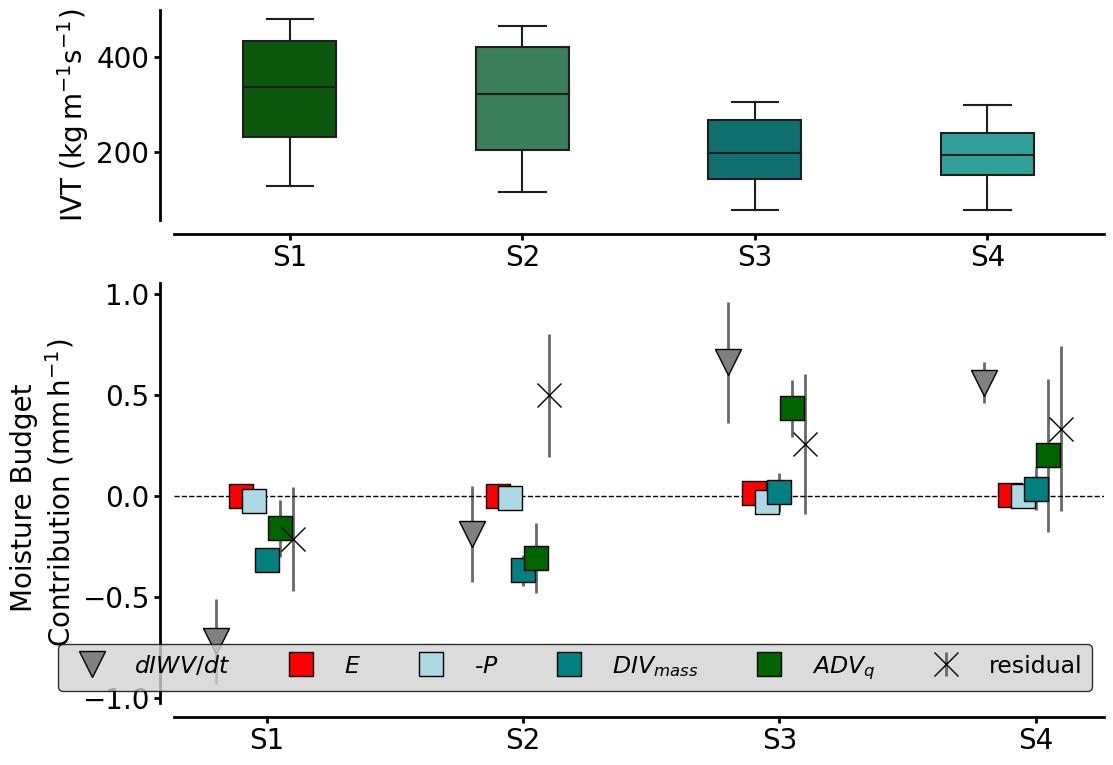

In [60]:
plot_component_tendency(d_IWV_dt_hamp,d_IWV_dt_uncertainty,
                            adv_q_series,mass_div_series,adv_q_unc,mass_div_unc,
                            sector_precip,Evap_Sectors,with_residuals=residuals,with_boxplots=True)

### Without Residuals

Figure saved as: C:\Users\u300737\Desktop\Desktop_alter_Rechner\PhD_UHH_WIMI\my_GIT\HALO_AC3_AR_Budget_Closure\notebooks/../plots/Fig11_HALO_Budget_components_tendency.pdf


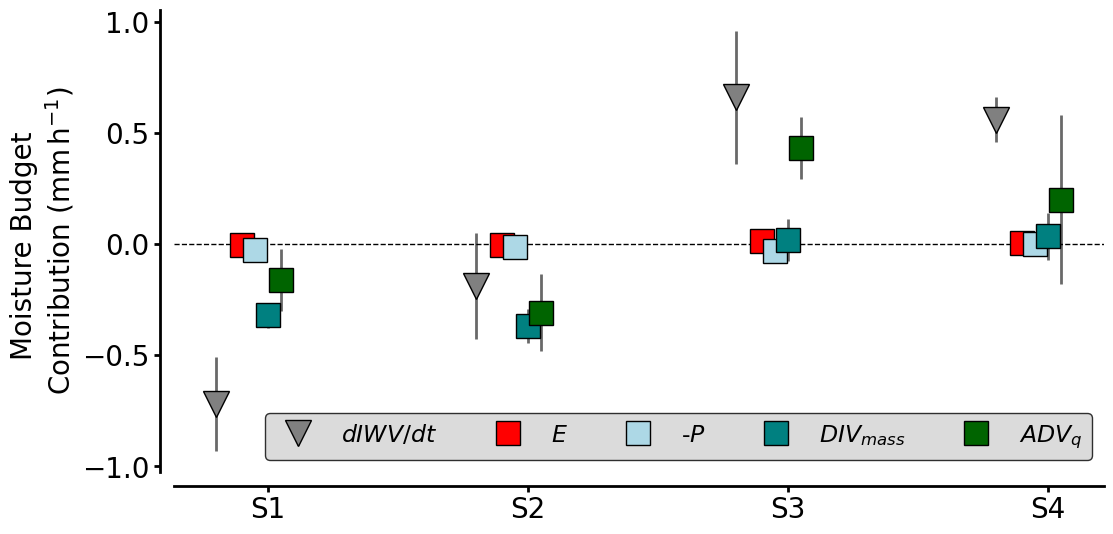

In [61]:
plot_component_tendency(d_IWV_dt_hamp,d_IWV_dt_uncertainty,
                            adv_q_series,mass_div_series,adv_q_unc,mass_div_unc,
                            sector_precip,Evap_Sectors,with_boxplots=False)

Figure saved as: C:\Users\u300737\Desktop\Desktop_alter_Rechner\PhD_UHH_WIMI\my_GIT\HALO_AC3_AR_Budget_Closure\notebooks/../plots/Fig13_HALO_Budget_residual_tendency.pdf


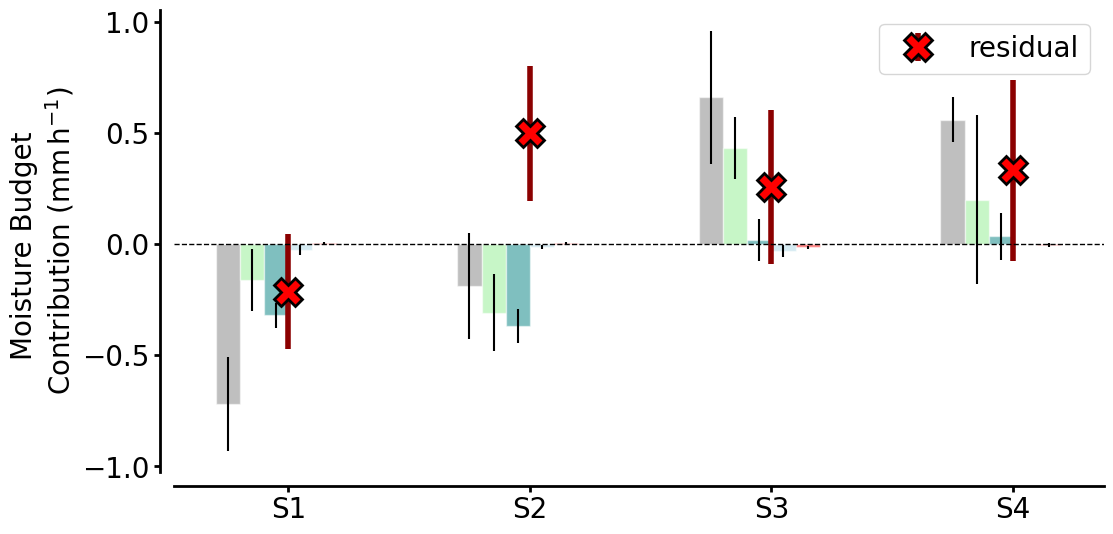

In [70]:
components={}
components["dIWV_dt"]     = d_IWV_dt_hamp
components["dIWV_dt_unc"] = d_IWV_dt_uncertainty
components["ADV"]         = adv_q_series
components["ADV_unc"]     = adv_q_unc
components["DIV"]         = mass_div_series
components["DIV_unc"]     = mass_div_unc
components["Precip"]      = sector_precip
components["Evap"]        = Evap_Sectors
plot_budget_residuals(residuals,components=components)